{0: 726, 1: 262, 2: 232, 3: 179, 4: 720, 5: 181, 6: 177, 7: 398, 9: 202, 10: 167, 11: 184, 12: 220, 13: 191, 15: 155, 16: 159, 17: 173, 18: 279, 19: 240, 20: 184, 21: 174, 22: 192, 23: 1391, 24: 486, 25: 170, 26: 407, 27: 459, 28: 372, 29: 332, 30: 302, 31: 336, 32: 328, 33: 298, 34: 368, 35: 356}
{0: 192, 1: 63, 2: 87, 3: 47, 4: 202, 5: 68, 6: 51, 7: 138, 9: 82, 10: 52, 11: 71, 12: 63, 13: 49, 15: 65, 16: 44, 17: 50, 18: 77, 19: 84, 20: 55, 21: 65, 22: 77, 23: 419, 24: 203, 25: 50, 26: 127, 27: 132, 28: 106, 29: 106, 30: 82, 31: 119, 32: 95, 33: 109, 34: 129, 35: 116}

Transform start......
Transform done!

Transform start......
Transform done!
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
[726, 262, 232, 179, 720, 181, 177, 398, 202, 167, 184, 220, 191, 155, 159, 173, 279, 240, 184, 174, 192, 1391, 486, 170, 407, 459, 372, 332, 302, 336, 328, 298, 368, 356]


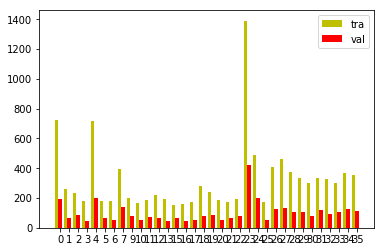

In [3]:
'''
本次作业完成的是 车牌数字字母字符识别

本代码 用来完成
1 调整图片为24×48大小
2 转换成灰度图像
3 完成训练集 验证集分割 并生成tfrecord文件
4 把训练集验证集各个标签图片数量比例展现出来
'''
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import skimage.io as io
from PIL import Image

def get_file(file_dir):

    images = []
    temp = []
    for root, sub_folders, files in os.walk(file_dir): # 利用walk函数遍历文件夹 
        # image directories
        for name in files:
            infile = os.path.join(root, name)
            outfile = os.path.join(root, name)
            im = Image.open(infile)
            (x,y) = im.size # 读取原图片大小
            x_s = 24 # 需要改变的长宽
            y_s = 48 
            out = im.resize((x_s,y_s),Image.ANTIALIAS) #改变大小
            out = out.convert('1') #转为灰度图像
            out.save(outfile) #把图片存到原路径
            images.append(os.path.join(root, name))
        for name in sub_folders:
            temp.append(os.path.join(root, name))
            
    labels = []        
    for one_folder in temp:        # 取文件夹的名称
        n_img = len(os.listdir(one_folder))
        letter = one_folder.split('/')[-1]
            
        if letter == 'A': #给图片打标签
            labels = np.append(labels, n_img*[0])
        elif letter == 'B':
            labels = np.append(labels, n_img*[1])
        elif letter == 'C':
            labels = np.append(labels, n_img*[2])
        elif letter == 'D':
            labels = np.append(labels, n_img*[3])
        elif letter == 'E':
            labels = np.append(labels, n_img*[4])
        elif letter == 'F':
            labels = np.append(labels, n_img*[5])
        elif letter == 'G':
            labels = np.append(labels, n_img*[6])
        elif letter == 'H':
            labels = np.append(labels, n_img*[7])
        elif letter == 'I':
            labels = np.append(labels, n_img*[8])
        elif letter == 'J':
            labels = np.append(labels, n_img*[9])
        elif letter == 'K':
            labels = np.append(labels, n_img*[10])
        elif letter == 'L':
            labels = np.append(labels, n_img*[11])
        elif letter == 'M':
            labels = np.append(labels, n_img*[12])
        elif letter == 'N':
            labels = np.append(labels, n_img*[13])
        elif letter == 'O':
            labels = np.append(labels, n_img*[14])
        elif letter == 'P':
            labels = np.append(labels, n_img*[15])
        elif letter == 'Q':
            labels = np.append(labels, n_img*[16])
        elif letter == 'R':
            labels = np.append(labels, n_img*[17])
        elif letter == 'S':
            labels = np.append(labels, n_img*[18])
        elif letter == 'T':
            labels = np.append(labels, n_img*[19])
        elif letter == 'U':
            labels = np.append(labels, n_img*[20])
        elif letter == 'V':
            labels = np.append(labels, n_img*[21])   
        elif letter == 'W':
            labels = np.append(labels, n_img*[22]) 
        elif letter == 'X':
            labels = np.append(labels, n_img*[23])
        elif letter == 'Y':
            labels = np.append(labels, n_img*[24])
        elif letter == 'Z':
            labels = np.append(labels, n_img*[25])
        elif letter == '0':
            labels = np.append(labels, n_img*[26])
        elif letter == '1':
            labels = np.append(labels, n_img*[27])
        elif letter == '2':
            labels = np.append(labels, n_img*[28])
        elif letter == '3':
            labels = np.append(labels, n_img*[29])
        elif letter == '4':
            labels = np.append(labels, n_img*[30])
        elif letter == '5':
            labels = np.append(labels, n_img*[31])
        elif letter == '6':
            labels = np.append(labels, n_img*[32])
        elif letter == '7':
            labels = np.append(labels, n_img*[33])
        elif letter == '8':
            labels = np.append(labels, n_img*[34])
        else:
            labels = np.append(labels, n_img*[35])
    
    # shuffle
    temp = np.array([images, labels])
    temp = temp.transpose()
    np.random.shuffle(temp) #打乱矩阵 
    
    # image_list = list(temp[:, 0])
    # label_list = list(temp[:, 1])
#     print(temp[:,0].shape)
    tra_image_list = list(temp[:11000, 0])
    tra_label_list = list(temp[:11000, 1])
    #把矩阵分为两部分 一部分用作训练 一部分验证
    Val_image_list = list(temp[11000:, 0])
    val_label_list = list(temp[11000:, 1])
    tra_label_list = [int(float(i)) for i in tra_label_list]
    val_label_list = [int(float(i)) for i in val_label_list]
    tarinCount = {}
    valCount = {}
#     统计验证集 训练集数量 为做条形图做准备
    for j in tra_label_list:
        if j== 0:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 1:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 2:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 3:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 4:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 5:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 6:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 7:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 8:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 9:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 10:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 11:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 12:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 13:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 14:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 15:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 16:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 17:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 18:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 19:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 20:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 21:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 22:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 23:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 24:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 25:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 26:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 27:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 28:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 29:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 30:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 31:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 32:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 33:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 34:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
        if j== 35:
            tarinCount[j] = tarinCount.get(j, 0) + 1 
    for z in val_label_list:
        if z== 0:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 1:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 2:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 3:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 4:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 5:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 6:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 7:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 8:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 9:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 10:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 11:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 12:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 13:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 14:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 15:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 16:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 17:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 18:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 19:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 20:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 21:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 22:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 23:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 24:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 25:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 26:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 27:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 28:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 29:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 30:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 31:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 32:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 33:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 34:
            valCount[z] = valCount.get(z, 0) + 1 
        if z== 35:
            valCount[z] = valCount.get(z, 0) + 1 
    print(tarinCount) 
    print(valCount)         
    return tra_image_list, tra_label_list, Val_image_list, val_label_list,tarinCount,valCount


#%%

def int64_feature(value):
    """Wrapper for inserting int64 features into Example proto."""
    if not isinstance(value, list):
        value = [value]
    
    return tf.train.Feature(int64_list=tf.train.Int64List(value=value))


def bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

#%%


def convert_to_tfrecord(images, labels, save_dir, name):#转换tfrecord
    
    filename = os.path.join(save_dir, name + '.tfrecords')
    n_samples = len(labels)
    
    if np.shape(images)[0] != n_samples:
        raise ValueError('Images size %d does not match label size %d.' %(images.shape[0], n_samples))
    
    writer = tf.python_io.TFRecordWriter(filename)
    print('\nTransform start......')
    for i in np.arange(0, n_samples):
        try:
            image = io.imread(images[i])  # type(image) must be array!
            image_raw = image.tostring()
            label = int(labels[i])
            example = tf.train.Example(features=tf.train.Features(feature={
                            'label': int64_feature(label),
                            'image_raw': bytes_feature(image_raw)}))
            writer.write(example.SerializeToString())
        except IOError as e:
            print('Could not read:', images[i])
            print('error: %s' %e)
            print('Skip it!\n')
    writer.close()
    print('Transform done!')
    

test_dir = '/home/r/mycar/data/车牌字符识别训练数据/字母'
save_dir = '/home/r/mycar'

name_tra = 'train'
name_val = 'Validation'
tra_images, tra_labels, val_images, val_labels,trainCout,valCount = get_file(test_dir)
convert_to_tfrecord(tra_images, tra_labels, save_dir, name_tra) # 训练集
convert_to_tfrecord(val_images, val_labels, save_dir, name_val) # 测试集


def plot_images(trainCount,valCount): # 生成直方图
    '''plot one batch size
    '''
    count1_=list()
    count2_=list()
    label_=list()
    for label, count in trainCount.items():
        label_.append(label)
        count1_.append(count)
    print(label_)
    print(count1_)
    for label,count in valCount.items():
        count2_.append(count)
    x =list(range(len(count1_)))  
    total_width, n = 0.8, 2  
    width = total_width / n  
    
    plt.bar(x, count1_, width=width, label='tra',fc = 'y')  
    for i in range(len(x)):  
        x[i] = x[i] + width  
    plt.bar(x, count2_, width=width, label='val',tick_label = label_,fc = 'r')  
    plt.legend()  
    plt.show()  
plot_images(trainCout,valCount)



In [ ]:
'''
用来读取tfrecord文件
本代码读取出的图片shape为[n,1152]
标签shape为[n,36]

'''
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import skimage.io as io
def read_and_decode(tfrecords_file, batch_size=25):
    '''read and decode tfrecord file, generate (image, label) batches
    Args:
        tfrecords_file: the directory of tfrecord file
        batch_size: number of images in each batch
    Returns:
        image: 4D tensor - [batch_size, width, height, channel]
        label: 1D tensor - [batch_size]
    '''
    print('start')
    batch_size = batch_size
    filename_queue = tf.train.string_input_producer([tfrecords_file])
    
    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_queue)
    img_features = tf.parse_single_example(
                                        serialized_example,
                                        features={
                                               'label': tf.FixedLenFeature([], tf.int64),
                                               'image_raw': tf.FixedLenFeature([], tf.string),
                                               })
    image = tf.decode_raw(img_features['image_raw'], tf.uint8)
    image = tf.reshape(image, [48, 24])
    image = tf.cast(image,tf.float32)*(1./255)
    label = tf.cast(img_features['label'], tf.int32)    
    image_batch, label_batch = tf.train.batch([image,label], batch_size = batch_size, capacity=10000)
    with tf.Session() as sess:
        i = 0

        coord = tf.train.Coordinator()
        threads = tf.train.start_queue_runners(coord=coord)
        
        try:
            while not coord.should_stop() and i < 1:
                # just plot one batch size 
                
                image, label = sess.run([image_batch, label_batch])
                #plot_images(image, label)
                # image = image.reshape(784)
                i += 1
                
        except tf.errors.OutOfRangeError:
            print('done!')
        finally:
            coord.request_stop()
    coord.join(threads)
    w ,= label.shape
    # print(s)
    b = np.empty((w,36))
    for i in range(w):
        for j in range(36):
            if j==label[i]:
                b[i][j]=1.
            else:
                b[i][j]=0.
    
    s,d,f=image.shape
    images=np.empty((s,d*f))
    for q in range(s):
        c=image[q]
        images[q]=c.reshape(d*f)
        # image=images
        print('ok')
    return images, b

In [1]:
'''''
为实现车牌数字字母字符识别(10个数字+24个字母为数据集)

'''''
import numpy as np
import tensorflow as tf
import read
import random
FLAGS = tf.app.flags.FLAGS
tf.app.flags.DEFINE_string('my_list', '/home/r/mycar/cnn', """存放模型的目录""")

[X_train, y_train] = read.read_and_decode('/home/r/mycar/train.tfrecords', 10000)
print(X_train.shape)
print(y_train.shape)
[X_val, y_val] = read.read_and_decode('/home/r/mycar/Validation.tfrecords', 3475)


def chooseone(image, label, batchsize):
    im = np.empty((batchsize, 1152))
    la = np.empty((batchsize, 36))
    for i in range(batchsize):
        a = random.randint(0, 3474)
        im[i] = image[a]
        la[i] = label[a]
    return im, la


# 权值初始化
def weight_variable(shape):
    # 用正态分布来初始化权值
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)


def bias_variable(shape):
    # 本例中用relu激活函数，所以用一个很小的正偏置较好
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)


# 定义卷积层
def conv2d(x, W):
    # 默认 strides[0]=strides[3]=1, strides[1]为x方向步长，strides[2]为y方向步长
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')


# pooling 层
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')


X_ = tf.placeholder(tf.float32, [None, 1152])
y_ = tf.placeholder(tf.float32, [None, 36])

# 把X转为卷积所需要的形式
X = tf.reshape(X_, [-1, 48, 24, 1])
# 第一层卷积：3×3×1卷积核32个 [3，3，1，32],h_conv1.shape=[-1, 48, 24, 32],学习32种特征
W_conv1 = weight_variable([3, 3, 1, 32])
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(X, W_conv1) + b_conv1)

# 第一个pooling 层[-1, 48, 24, 32]->[-1, 24, 12, 32]
h_pool1 = max_pool_2x2(h_conv1)

# 第二层卷积：5×5×32卷积核64个 [3，3，32，64],h_conv2.shape=[-1, 24, 12, 64]
W_conv2 = weight_variable([3, 3, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)

# 第二个pooling 层,[-1, 24, 12, 64]->[-1, 14, 6, 64] 
h_pool2 = max_pool_2x2(h_conv2)

# 
W_conv3 = weight_variable([3, 3, 64, 96])
b_conv3 = bias_variable([96])
h_conv3 = tf.nn.relu(conv2d(h_pool2, W_conv3) + b_conv3)
h_pool3 = max_pool_2x2(h_conv3)

# flatten层，[-1, 6, 3, 96]->[-1, 6*3*96],即每个样本得到一个6*3*96维的样本
h_pool2_flat = tf.reshape(h_pool3, [-1, 6*3*96])

# fc1
W_fc1 = weight_variable([6*3*96, 512])
b_fc1 = bias_variable([512])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# dropout: 输出的维度和h_fc1一样，只是随机部分值被值为零
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# 输出层
W_fc2 = weight_variable([512, 36])
b_fc2 = bias_variable([36])
y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)


# 1.损失函数：cross_entropy
cross_entropy = -tf.reduce_sum(y_ * tf.log(y_conv))
# 2.优化函数：AdamOptimizer
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

# 3.预测准确结果统计
# 预测值中最大值（１）即分类结果，是否等于原始标签中的（１）的位置。argmax()取最大值所在的下标
z = tf.argmax(y_conv, 1)
q = tf.arg_max(y_, 1)
correct_prediction = tf.equal(z, q)  
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
test_acc_sum = tf.Variable(0.0)
batch_acc = tf.placeholder(tf.float32)
new_test_acc_sum = tf.add(test_acc_sum, batch_acc)
update = tf.assign(test_acc_sum, new_test_acc_sum)
saver = tf.train.Saver(max_to_keep=2)
# 定义了变量必须要初始化，或者下面形式
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter(FLAGS.my_list, sess.graph)

    ckpt = tf.train.latest_checkpoint(FLAGS.my_list)
    step = 0
    if ckpt:
        check_point_path = '/home/r/mycar/cnn'  # 保存好模型的文件路径
        ckpt = tf.train.get_checkpoint_state(checkpoint_dir=check_point_path)
        saver.restore(sess, ckpt.model_checkpoint_path)

    Y = np.zeros(3000)
    X_batch, y_batch = chooseone(X_val, y_val, 3000)
    Ytemp = y_conv.eval(feed_dict={X_: X_batch, keep_prob: 1.0})
    for i in range(3000):
        Y[i] = np.argmax(Ytemp[i])
    print("验证集正确率为 %g" % accuracy.eval(feed_dict={X_: X_batch, y_: y_batch, keep_prob: 1.0}))


for j in range(36):
    k = 0
    l = 0
    for i in range(3000):
        if np.argmax(y_batch[i]) == j:
            k = k+1
            if Y[i] == j:
                if np.argmax(y_batch[i]) == Y[i]:
                    l = l+1
    if j < 26:
        a = str(chr(ord('A') + j))
    elif j > 25:
        a = str(chr(ord('0') + j - 26))
    if k==0:
        print('样本中无%s 无法计算' % a)
    else:
        print('%s召回率为%g' % (a, (l/k)))


(10000, 1152)
(10000, 36)
Instructions for updating:
Use `argmax` instead
INFO:tensorflow:Restoring parameters from /home/r/mycar/cnn/mnist-0
验证集正确率为 0.981333
A召回率为1
B召回率为0.985507
C召回率为0.97561
D召回率为0.880952
E召回率为0.982249
F召回率为0.962963
G召回率为1
H召回率为1
样本中无I 无法计算
J召回率为0.984615
K召回率为1
L召回率为1
M召回率为1
N召回率为0.979167
样本中无O 无法计算
P召回率为0.921569
Q召回率为0.947368
R召回率为0.975
S召回率为0.985075
T召回率为0.955882
U召回率为1
V召回率为1
W召回率为0.96875
X召回率为0.994521
Y召回率为1
Z召回率为1
0召回率为0.906542
1召回率为0.982456
2召回率为1
3召回率为0.97619
4召回率为0.953846
5召回率为0.990654
6召回率为1
7召回率为0.977011
8召回率为0.960784
9召回率为0.981308
